<a href="https://colab.research.google.com/github/Brobrian61/Ai-projects/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target # target variable (median house value)


In [ ]:
# Display first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
# Check for missing values
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
# Check for missing values
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
# Summary statistics
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [ ]:
# Show/hidden output

# Summary statistics
print(df.describe())
print(df.describe())

# Show/hidden output


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [ ]:
# Correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Heatmap")
# plt.show()

In [ ]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# Split dataset into features (X) and target (Y)
# Changed "PRICE" to "MedHouseVal" as the target variable column is named "MedHouseVal"
X= df.drop("MedHouseVal", axis=1) #Independent varibles
Y= df["MedHouseVal"] #Dependent variable


In [ ]:

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [ ]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# predictions
y_pred = model.predict(X_test_scaled)

In [ ]:


# Display the predictions
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [ ]:
# model Evalution
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
# AIC and BIC Calculation (using statsmodels) ARE essentials tools in multiple linear regression for selecting the best model
# Changed X_train_const_scaled to X_train_scaled as X_train_const_scaled was not defined
X_train_const = sm.add_constant(X_train_scaled) # Add intercept
ols_model = sm.OLS(y_train, X_train_const).fit()
aic = ols_model.aic
bic = ols_model.bic

In [ ]:
# print perfomance metrics
print("\n model Evaluation Metrics:")
print(f"R-Squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.4f}")
print(f"Mean Squared Error (MSE): {mse:,.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.4f}")
print(f"Akaike Information Criterion (AIC): {aic:,.4f}")
print(f"Bayesian Information Criterion (BIC): {bic:,.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.4f}")
print(f"Akaike Information Criterion (AIC): {aic:,.4f}")
print(f"Bayesian Information Criterion (BIC): {bic:,.4f}")





 model Evaluation Metrics:
R-Squared (R2): 0.5758
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Akaike Information Criterion (AIC): 36,013.6303
Bayesian Information Criterion (BIC): 36,083.0369
Root Mean Squared Error (RMSE): 0.7456
Akaike Information Criterion (AIC): 36,013.6303
Bayesian Information Criterion (BIC): 36,083.0369


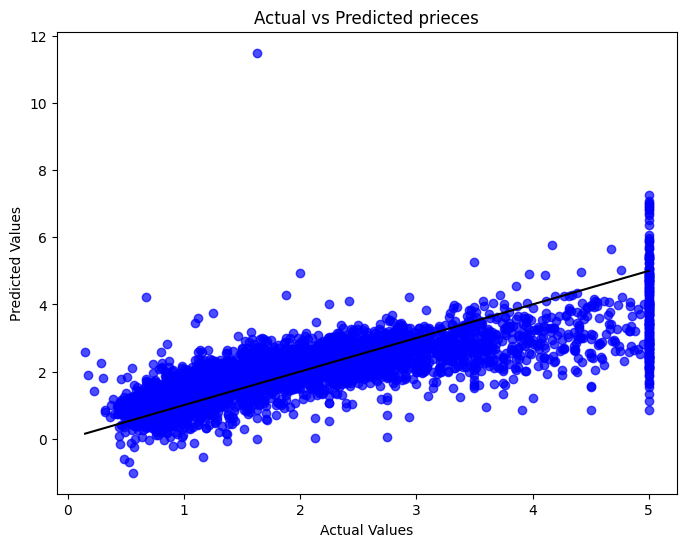

In [ ]:
# plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7,color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted prieces")
# Changed linestyle=black to color="black" and linestyle="-"
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="-")
plt.show()

In [ ]:
#...NEW FEATURE: USER INPUT PREDICTION...
print("\n Enter values to predict house price")


 Enter values to predict house price


In [ ]:
# prompt user to enter values for all features
user_input = []
for feature in X.columns:
  value = float(input(f"Enter value for {feature}: "))
  user_input.append(value)

Enter value for MedInc: 56
Enter value for HouseAge: 8
Enter value for AveRooms: 10
Enter value for AveBedrms: 3
Enter value for Population: 15
Enter value for AveOccup: 10
Enter value for Latitude: 23
Enter value for Longitude: 26


In [ ]:
# Convert user input into a NumPy array and scale it
user_input_array = np.array(user_input).reshape(1, -1) # Convert the list to a NumPy array and reshape it for scaling
user_input_scaled = scaler.transform(user_input_array) # Scale the user input using the fitted scaler

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# predict house price
predicted_price = model.predict(user_input_scaled)
print(f"\n predicated House price: ${predicted_price[0]:,.2f}")


 predicated House price: $-31.67
